In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os
zip_path='/content/drive/MyDrive/plant_disease_detection.zip'
extracted_path='/content'
if os.path.exists(zip_path):
  try:
    with zipfile.ZipFile(zip_path,'r') as zip_read:
      zip_read.extractall(extracted_path)
    print(f"File has succesfully extracted from {zip_path} to {extracted_path}")
  except Exception as e:
    print(e)
else:
  print(f"File not found at {zip_path}")

File has succesfully extracted from /content/drive/MyDrive/plant_disease_detection.zip to /content


In [3]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import glob as gb
import cv2
import pandas as pd
import pathlib

In [4]:
train='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'

In [5]:
size=224

In [7]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0,
    height_shift_range=0,
    rescale=1/255.0,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=0,
    vertical_flip=0,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    train,
    target_size=(size,size),
    subset='training',
    batch_size=164,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=True

)

Found 63282 images belonging to 38 classes.


In [8]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

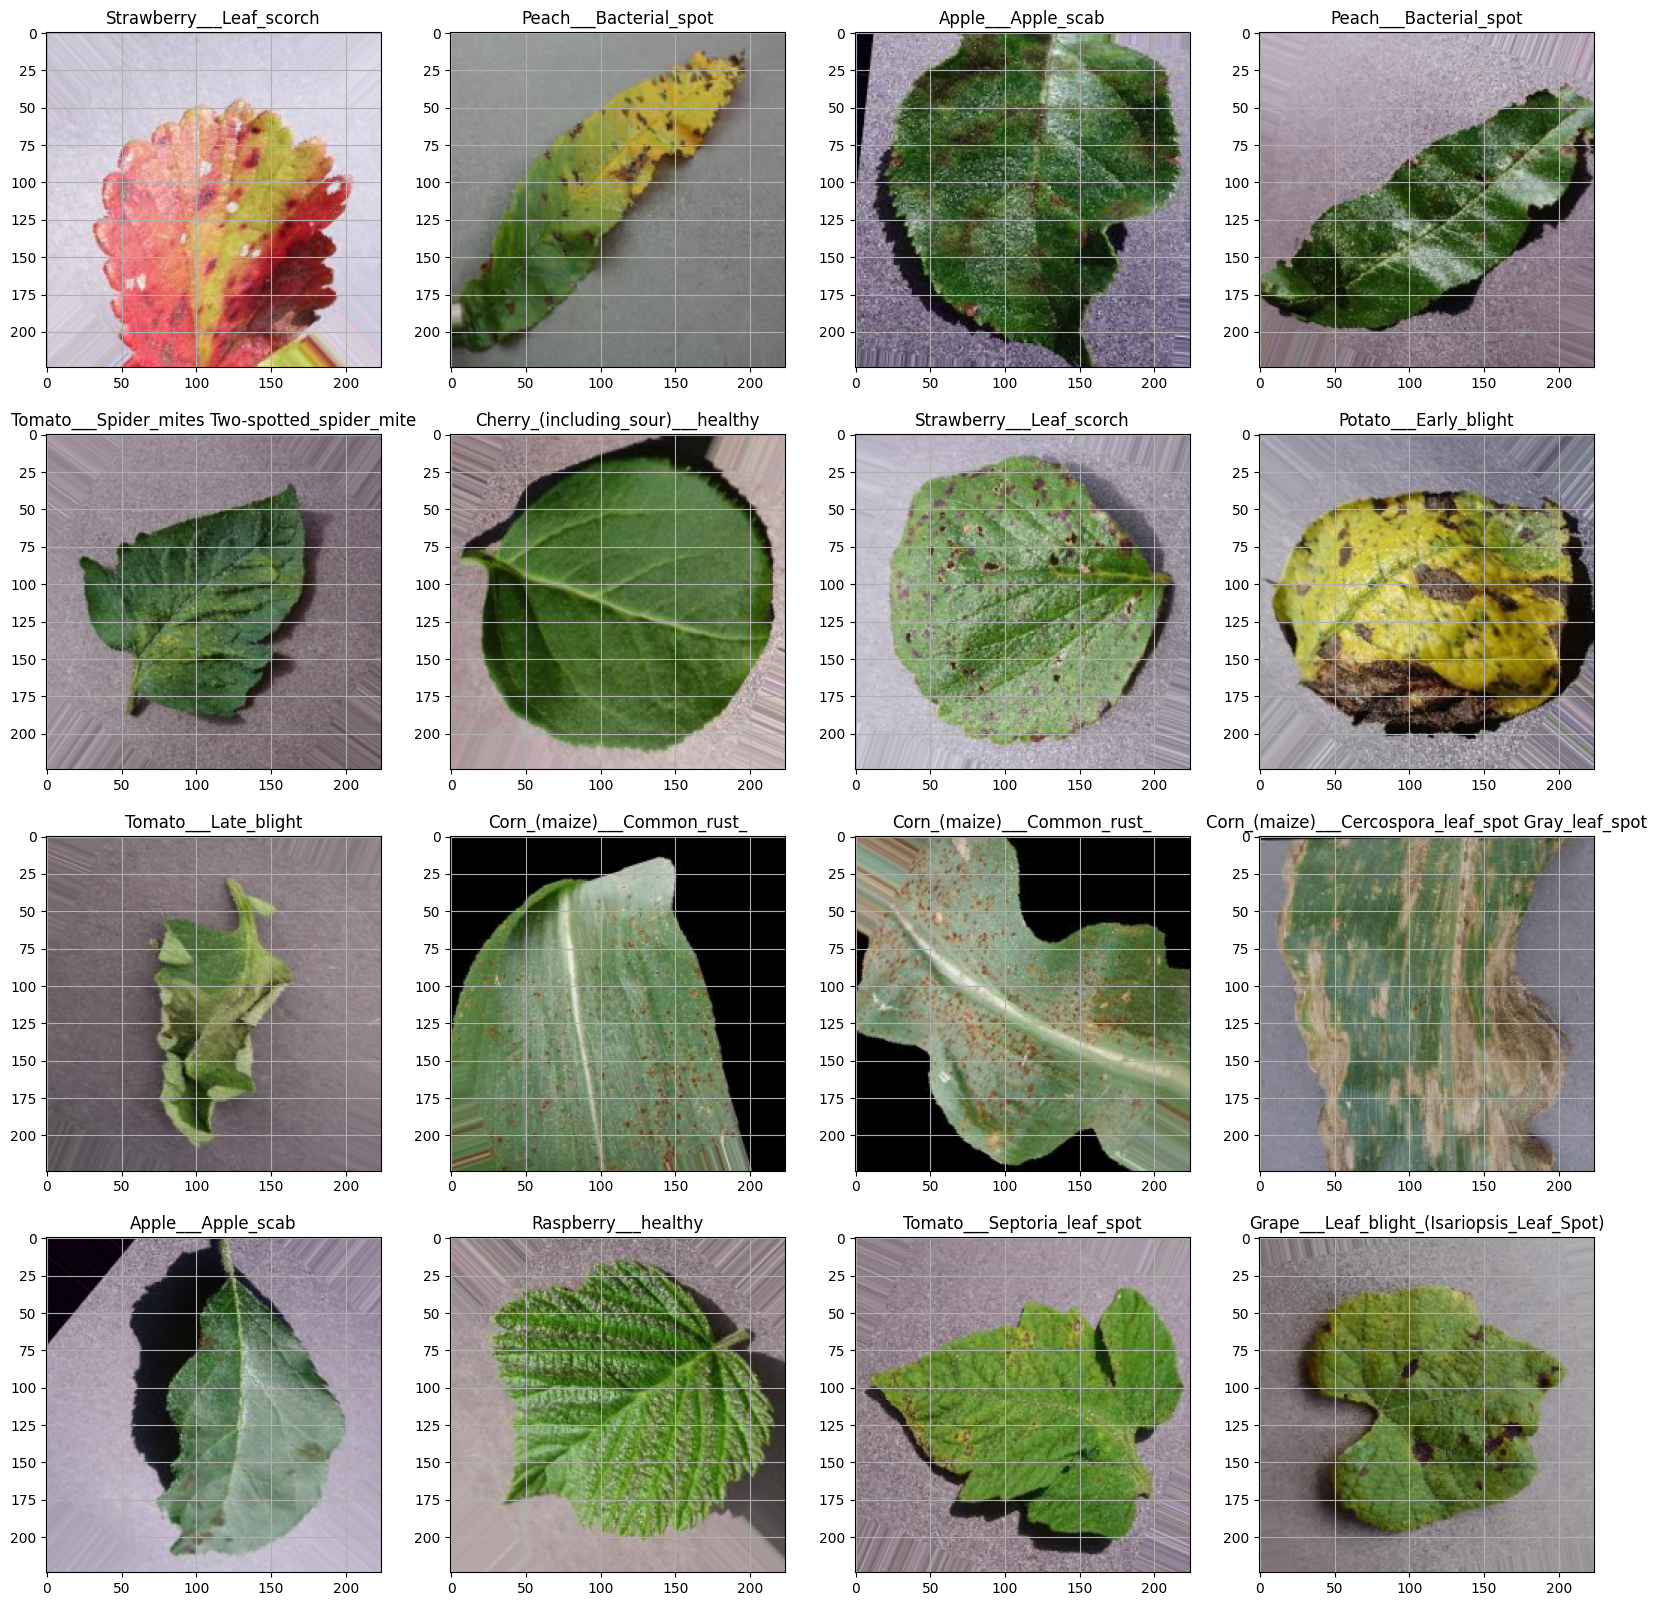

In [12]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch,Y_batch in train_generator:
 for i in range(0,16):
  plt.subplot(4,4,i+1)
  plt.imshow(X_batch[i])
  plt.title(classes[np.where(Y_batch[i]==1)[0][0]])
  plt.grid(None)
 plt.show()
 break


In [13]:
valid='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [15]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    valid,
    target_size=(size,size),
    subset="validation",
    batch_size=164,
    shuffle=False,
    color_mode='rgb',
    class_mode='categorical'


)

Found 1742 images belonging to 38 classes.


In [16]:
valid_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [17]:
test='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [20]:
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    test,
    target_size=(size,size),
    batch_size=164,
    shuffle=False,
    color_mode='rgb',
    class_mode='categorical'


)


Found 17572 images belonging to 38 classes.


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [28]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=7, activation='relu', strides=1,
                 input_shape=(224, 224, 3), padding="same", name="Conv2D_1"))
model.add(MaxPooling2D(pool_size=2, name="MaxPool_1"))
model.add(Conv2D(filters=64, kernel_size=5, strides=1, padding='same',
                 activation='relu', name="Conv2D_2"))
model.add(MaxPooling2D(pool_size=2, name="MaxPool_2"))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same',
                 activation='relu', name="Conv2D_3"))
model.add(MaxPooling2D(pool_size=2, name="MaxPool_3"))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same',
                 activation='relu', name="Conv2D_4"))

model.add(MaxPooling2D(pool_size=2, name="MaxPool_4"))

model.add(Flatten(name="Flatten1"))

model.add(Dense(units=128, activation='relu', name="Dense1"))
model.add(Dropout(0.2, name="Dropout1"))

model.add(Dense(units=64, activation='relu', name="Dense2"))
model.add(Dropout(0.2, name="Dropout2"))

model.add(Dense(units=32, activation='softmax', name="Dense3"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv2D_1 (Conv2D)                    │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool_1 (MaxPooling2D)             │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_2 (Conv2D)                    │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool_2 (MaxPooling2D)             │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_3 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool_3 (MaxPooling2D)             │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_4 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool_4 (MaxPooling2D)             │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten1 (Flatten)                   │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout1 (Dropout)                   │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout2 (Dropout)                   │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense3 (Dense)                       │ (None, 32)                  │           2,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,858,016 (26.16 MB)

 Trainable params: 6,858,016 (26.16 MB)

 Non-trainable params: 0 (0.00 B)